In [1]:
# 1. Importation des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 2. Chargement des donnees :

df = pd.read_csv('breast-cancer.csv')

In [3]:
# 2.a . Affichage des 5 premieres lignes 

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# 2.b. Forme du dataset : Matrice de dimensions (569 , 32)

df.shape

(569, 32)

In [5]:
# 2.c . Type de chaque colonne : ()

print(df.info()) # Le dataset possede 32 colonnes de type d float64(30), int64(1), object(1)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
#2.d . Detection des donnees manquantes :
# Le df.info()  de la cellule precedente nous permet d'affirmer avec certitude qu'il n'y a pas de donnees manquantes 
#On pourrait proceder a une operation supplementaire pour davantage convaincre : ||>

print(df.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [7]:
# 2.e . Distribution de la variable cible ""Diagnostics"
print("""Distribution de la variable cible : Diagnosis \n""")
print(f"{(df["diagnosis"].value_counts(normalize = True)*100).round(2)}")

# La classe B : 62.7 %
# La classe M : 37.26 % 
# Conclusion : La distribution est déséquilibrée (legerement)


Distribution de la variable cible : Diagnosis 

diagnosis
B    62.74
M    37.26
Name: proportion, dtype: float64


In [8]:
# 3 . a. Supression de la colonne 'id'
df.drop('id' , axis = 1 , inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [9]:
#3. b . Encoder la target (diagnosis) : 
# On cree une nouvelle colonne diagnosis_encoded** qui affiche les valeurs de target definies par : M -> 1 , B-> 0

df["diagnosis_enc"] = df["diagnosis"].map({
    "M" : 1,
    "B" : 0
})


In [ ]:
# 3.c. Verifier les doublons et les supprimer (eventuellement)
# Le count etant de 0 , on peut affirmer qu'il n'y pas de doublons
print("Decompte des doublons dans le dataset entier : \n")
print(df.duplicated().sum())

Decompte des doublons dans le dataset entier : 

0


# Partie 2 : Analyse exploratoire complete 

In [11]:
# 4.a. Calcul des statistiques descriptives : 
# Pour le calcul on utilisera directement les informations statistique du describe()

df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [12]:
# 4. b. Identification des features avec la plus grande variance :

# 1 : selection des features numeriques 
#(var() ne s'applique sur des valeurs numeriques et le dataset ci-dessus possede la colonne diagnosis de type string )

numercal_values = df.select_dtypes(include=np.number) 

#2 : Calcul de la variance avec la methode var()
df_var = numercal_values.var()  

print(f"TABLEAUX DES VARIANCES DES FEATURES :\n\n{df_var.sort_values(ascending= False).round(2)}")

TABLEAUX DES VARIANCES DES FEATURES :

area_worst                 324167.39
area_mean                  123843.55
area_se                      2069.43
perimeter_worst              1129.13
perimeter_mean                590.44
texture_worst                  37.78
radius_worst                   23.36
texture_mean                   18.50
radius_mean                    12.42
perimeter_se                    4.09
texture_se                      0.30
diagnosis_enc                   0.23
radius_se                       0.08
concavity_worst                 0.04
compactness_worst               0.02
concavity_mean                  0.01
concave points_worst            0.00
symmetry_worst                  0.00
compactness_mean                0.00
concave points_mean             0.00
concavity_se                    0.00
symmetry_mean                   0.00
smoothness_worst                0.00
fractal_dimension_worst         0.00
compactness_se                  0.00
smoothness_mean                 0.00

In [13]:
# 4.c . Calcul de l'asymetrie : 
# La majorite des variables sont asymetriques a droite (skew>0) 
#Remarque : Une forte probabilité que la distribution soit asymetrique .

print("VALEUR D'ASYMETRIE AVEC LA METHODE SKEW ()\n\n")
print(numercal_values.skew().sort_values(ascending=False))


VALEUR D'ASYMETRIE AVEC LA METHODE SKEW ()


area_se                    5.447186
concavity_se               5.110463
fractal_dimension_se       3.923969
perimeter_se               3.443615
radius_se                  3.088612
smoothness_se              2.314450
symmetry_se                2.195133
compactness_se             1.902221
area_worst                 1.859373
fractal_dimension_worst    1.662579
texture_se                 1.646444
area_mean                  1.645732
compactness_worst          1.473555
concave points_se          1.444678
symmetry_worst             1.433928
concavity_mean             1.401180
fractal_dimension_mean     1.304489
compactness_mean           1.190123
concave points_mean        1.171180
concavity_worst            1.150237
perimeter_worst            1.128164
radius_worst               1.103115
perimeter_mean             0.990650
radius_mean                0.942380
symmetry_mean              0.725609
texture_mean               0.650450
diagnosis_enc      

In [1]:
# 5.a. Visualisation des features importantes- avec KDE 
#feat_imp est le dataframe contenant 
list_feature=df_var.sort_values(ascending=False).head(6).index 
plt.figure(figsize=(10,5))
for feat in list_feature:
   
    sns.histplot(data= df, x=feat, kde = True , bins=30)
    plt.title(f"DISTRIBUTION DE {feat} AVEC KDE")
    plt.show()
#Visuellement les differentes features suivent une distribution asymetrique a gauche (forte asymetrique)

NameError: name 'df_var' is not defined

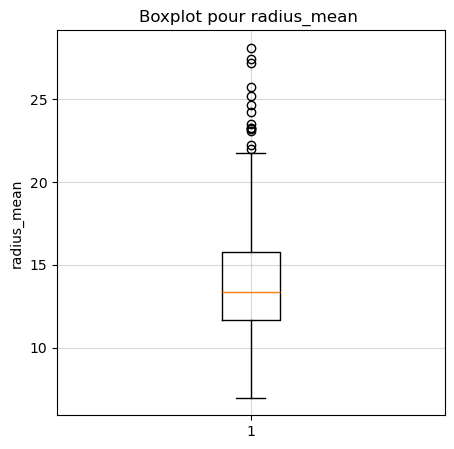

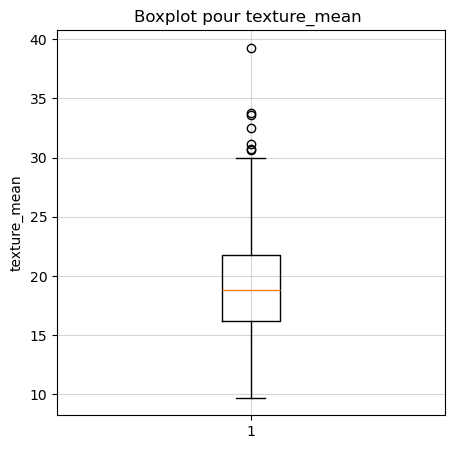

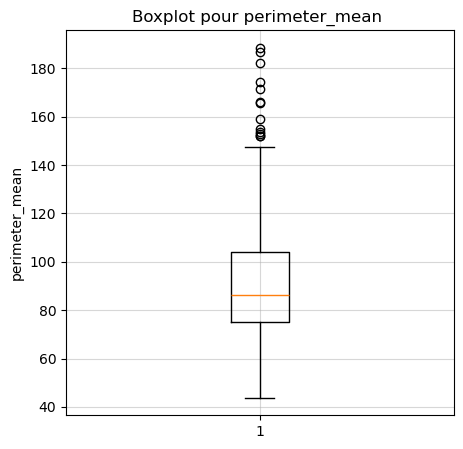

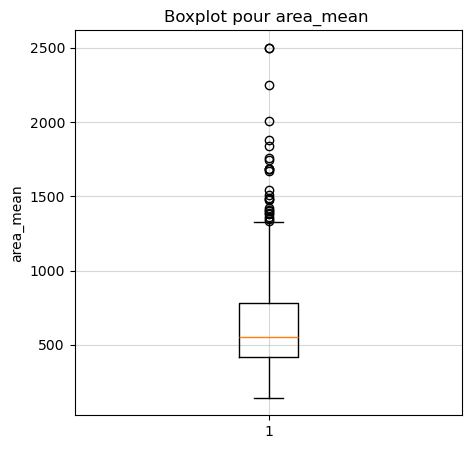

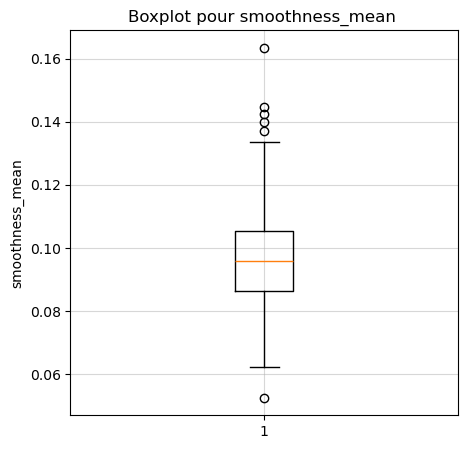

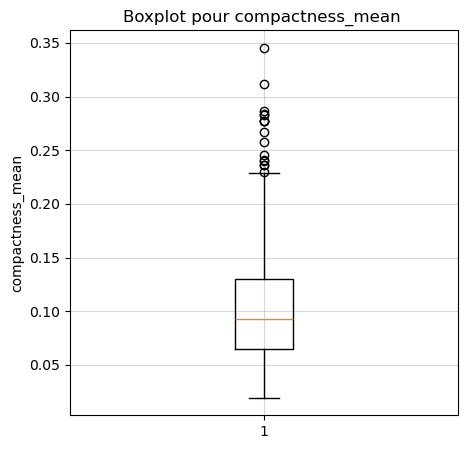

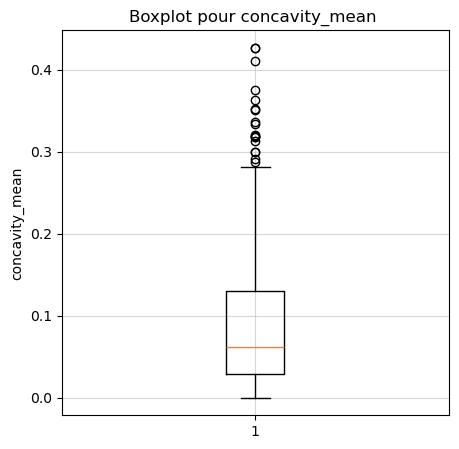

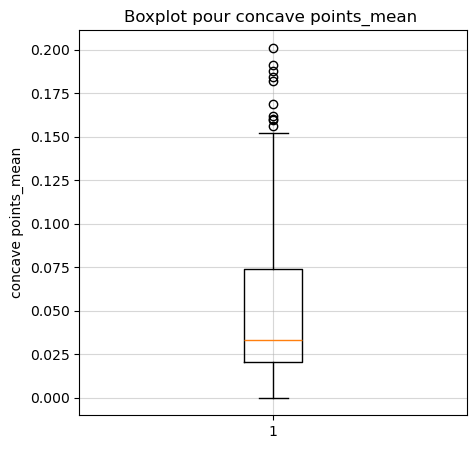

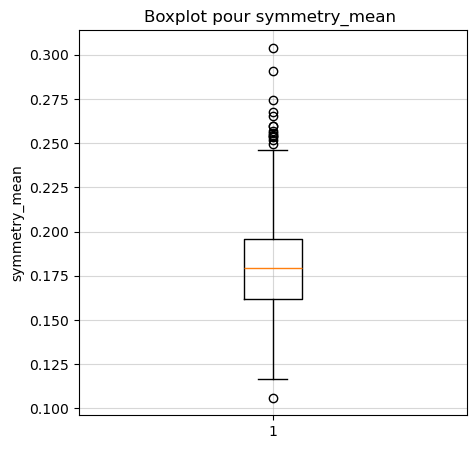

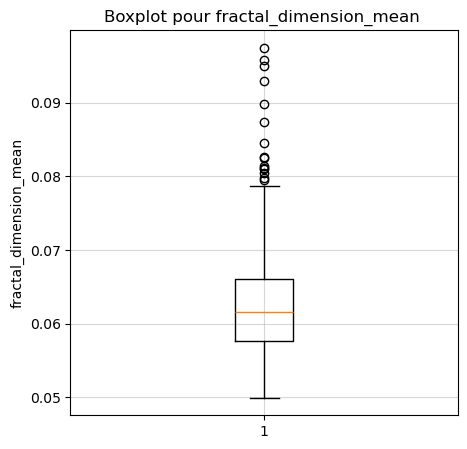

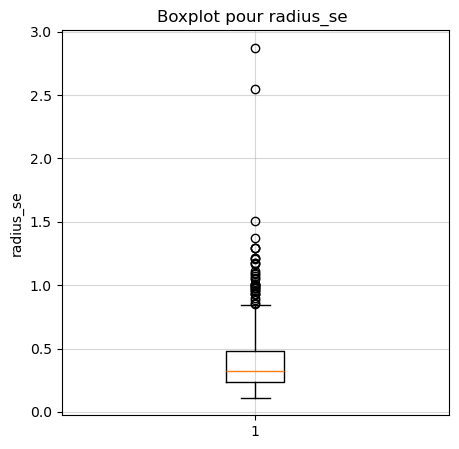

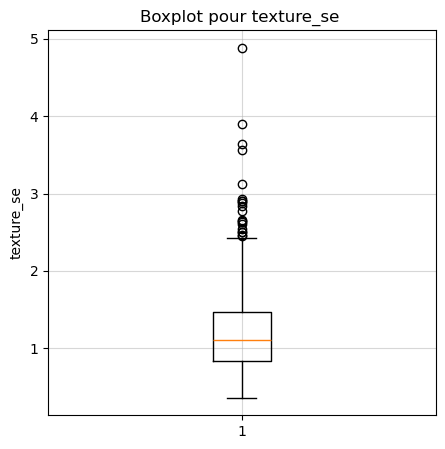

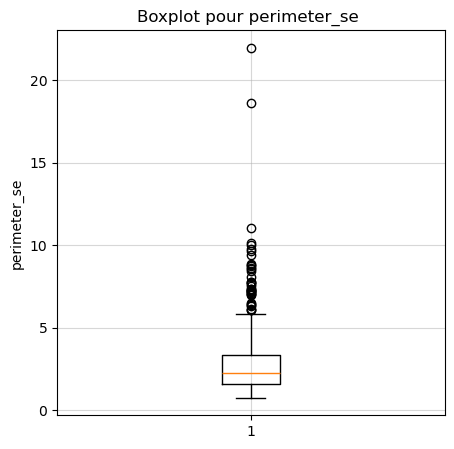

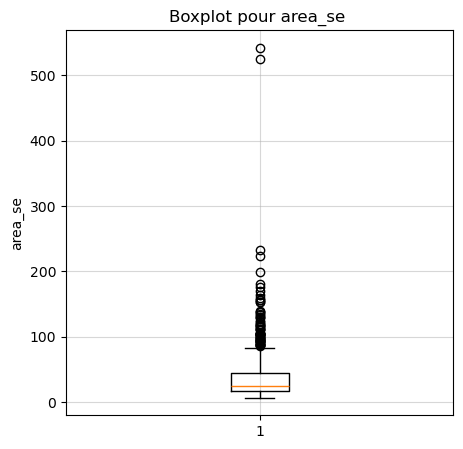

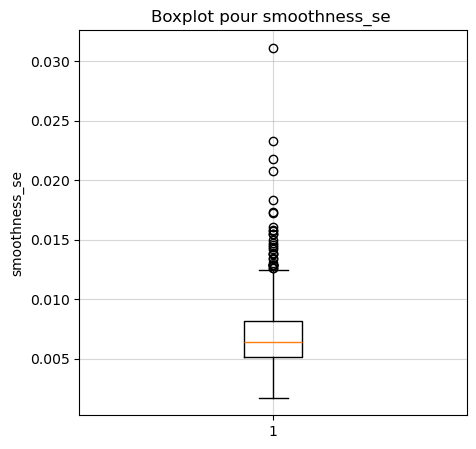

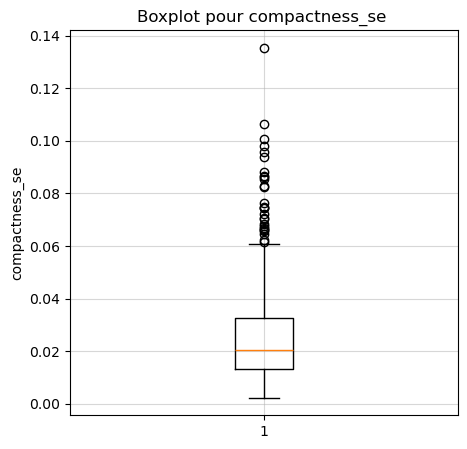

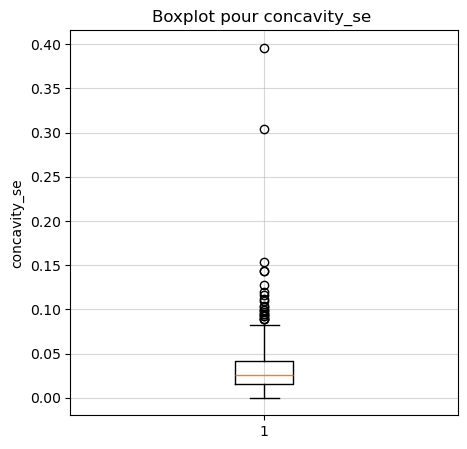

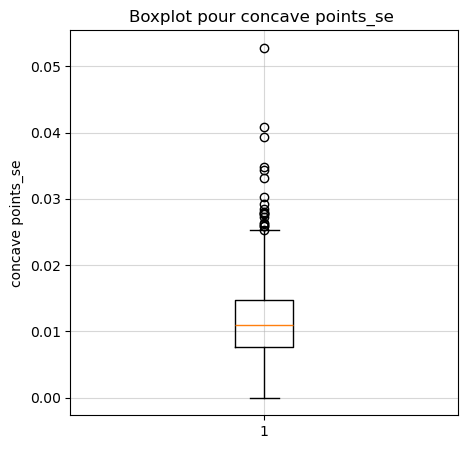

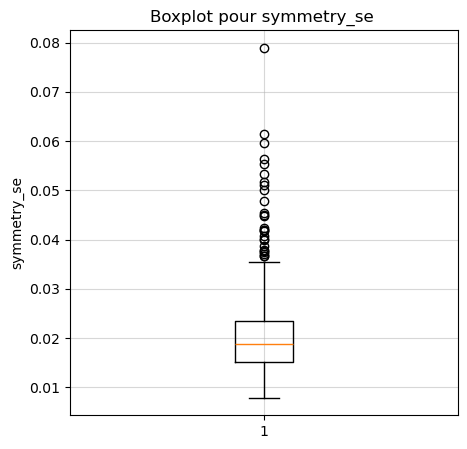

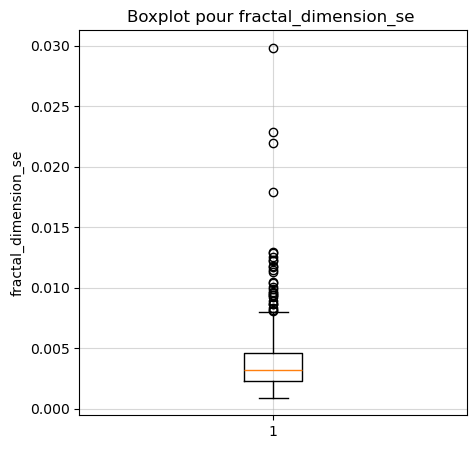

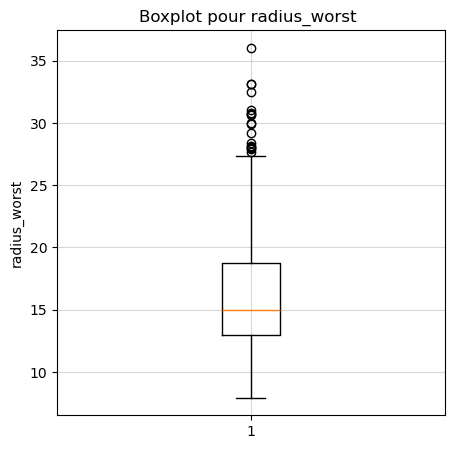

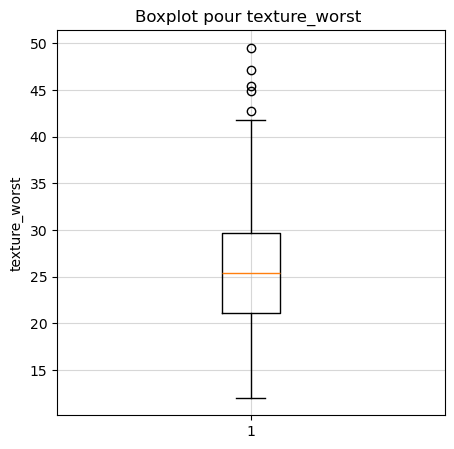

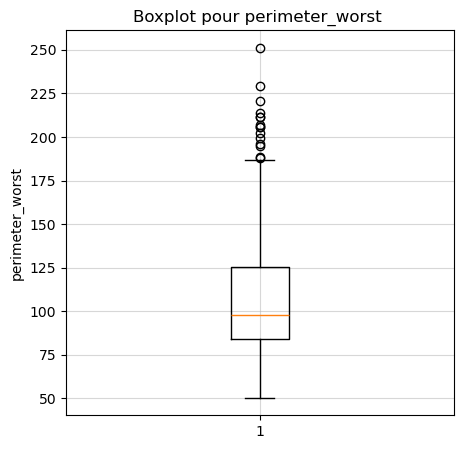

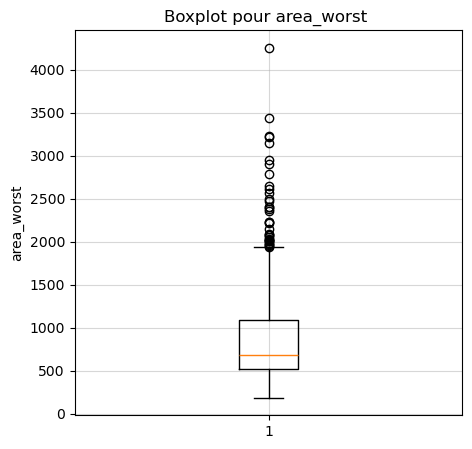

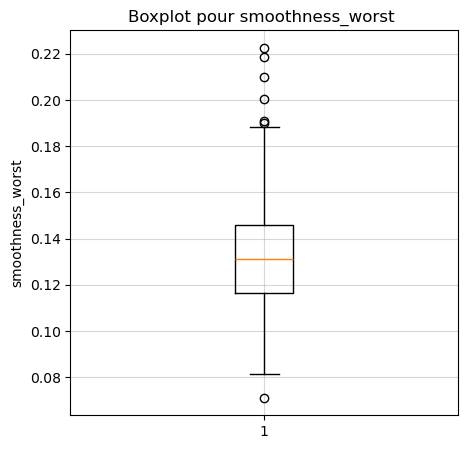

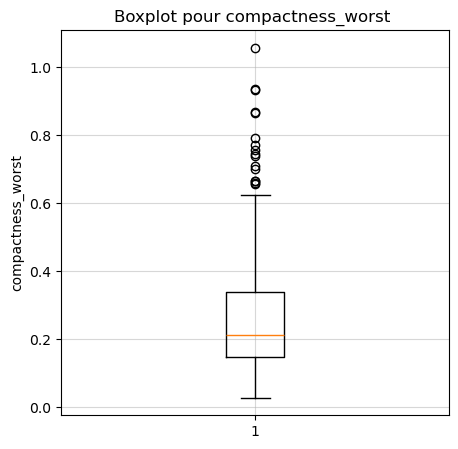

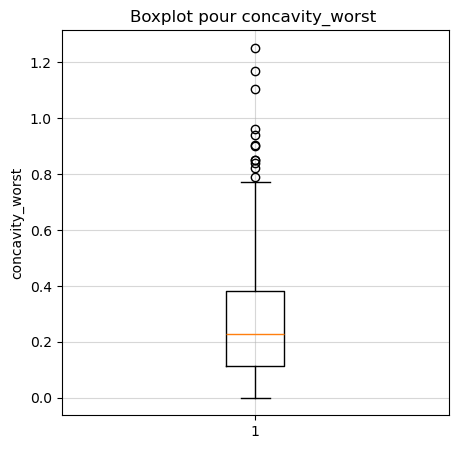

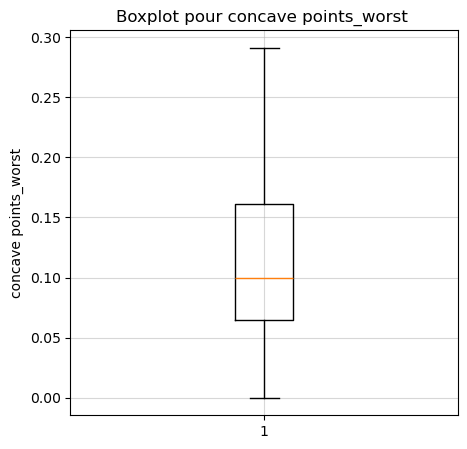

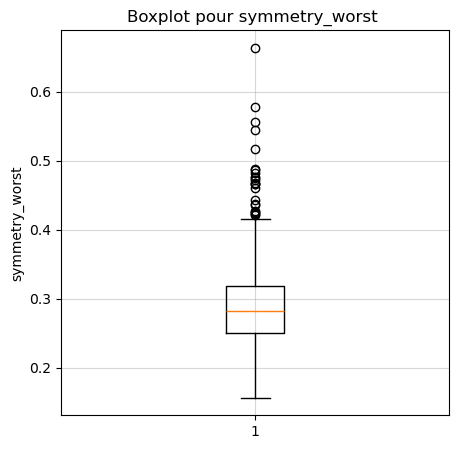

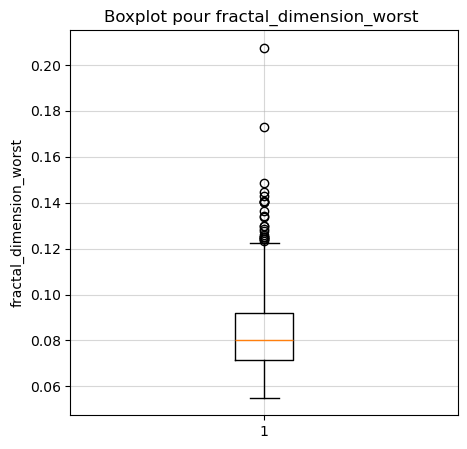

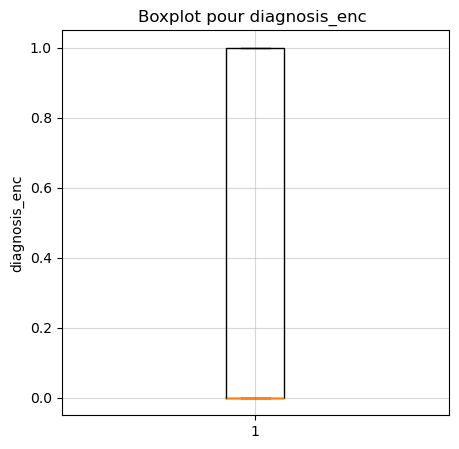

In [15]:
# 5.b. Boxplot
# Visuellement on detecte la presence des outliers sur beaucoup de feature 
#On utilisera plusieurs aspects de l'EDA pour determiner comment gerer efficacement ces outliers 
for feat in numercal_values .columns.to_list() :
    plt.figure(figsize=(5,5))
    plt.boxplot(df[feat])
    plt.title(f"Boxplot pour {feat} ")
    plt.ylabel(feat)
    plt.grid(alpha=0.5)
    plt.show()
    

In [16]:
#5.c Pie Chart :


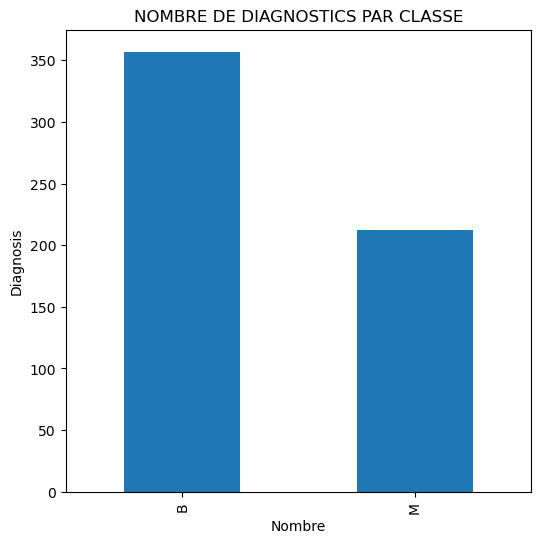

In [17]:
#5.c. Barplot :
# Le  Barplot ci-dessous represente les occurences des differents diagnostics (M Et B)
# On remarque une representativite plus importante de la classe B : Benign .
# On ajustera les donnees d'entrainement en specifiant pour le paramtre class_weight la valeur balanced'
#et en ajustant les metriques Recall ,F1_score,ROC_AUX

plt.figure(figsize =(6,6))
df['diagnosis'].value_counts().plot(kind='bar')
plt.title("NOMBRE DE DIAGNOSTICS PAR CLASSE")
plt.xlabel("Nombre")
plt.ylabel("Diagnosis")
plt.show()

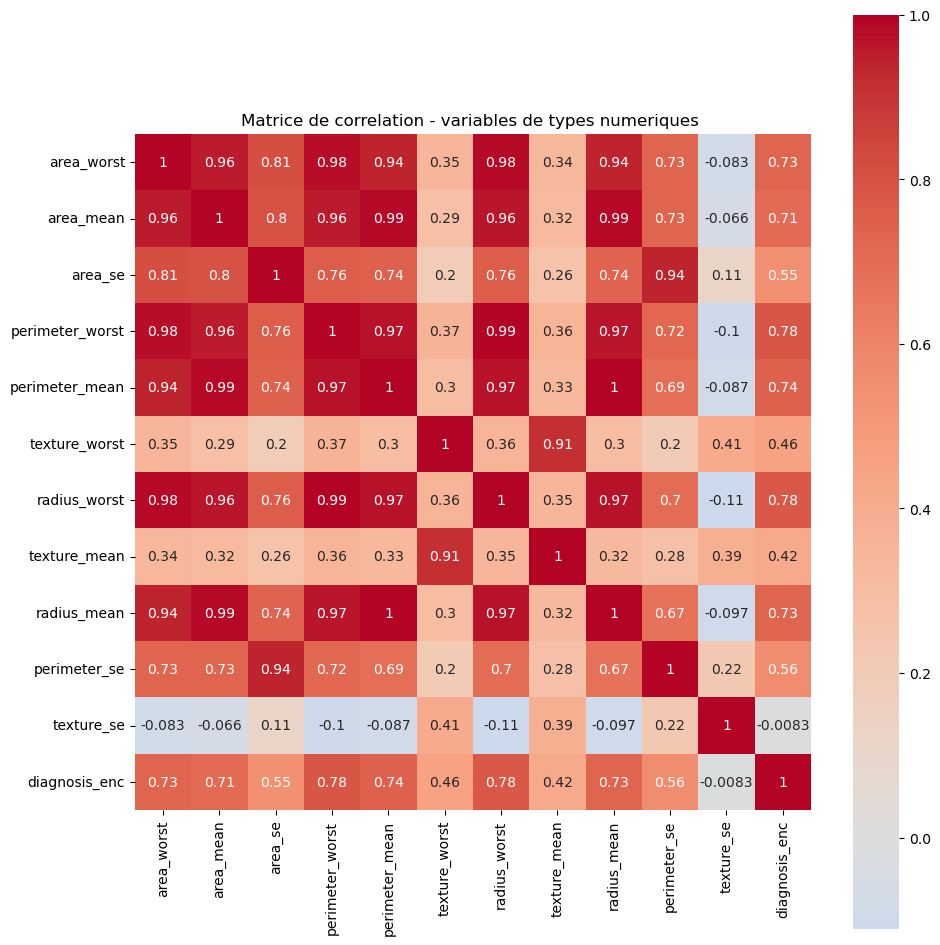

In [18]:
# 6.a. MATRICE DE CORRELATION :
# Le dataset a un nombre assez élevé de colonnes . Dans un heatmap les correlations seront a peine visible 
# Il est donc necessaire de faire un tri en choisissant les colonnes avec la variance la plus élevée (un top 12 )
# Remarque  : Certaines features sont fortement correlee avec la target . Ce qui en fait des candidats potentiels a exploiter pour l'entrainement
df_var2 =  (df.select_dtypes(include=np.number).var().sort_values(ascending=False).head(12).index) 
corr_matrix = df[df_var2].corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr_matrix , annot=True ,cmap ="coolwarm" , center=0 , square=True)
plt.title("Matrice de correlation - variables de types numeriques ")
plt.tight_layout()
plt.show()


In [19]:
# 6.c. SCTTERPLOTS DES 3 PAIRS DE FEATURES LES PLUS CORRELEES
# On va proceder par 3 etapes :
# Calcul de la correlation des features numeriques uniquement 
# Extraction des pairs de correlation sans doublons

#Visualisation avec les scatterplots 
df_num = df.select_dtypes(include=np.number)
corr_matrix2 = df_num.corr()
corr_pairs = (corr_matrix2.abs().where(np.triu(np.ones(corr_matrix2.shape), k=1).astype(bool)).stack().sort_values(ascending=False))
print(corr_pairs.head(3))


radius_mean   perimeter_mean     0.997855
radius_worst  perimeter_worst    0.993708
radius_mean   area_mean          0.987357
dtype: float64


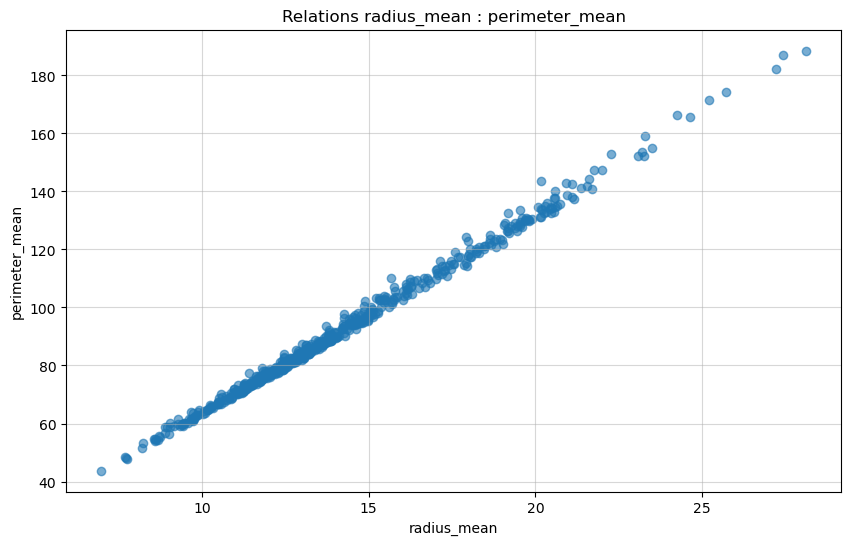

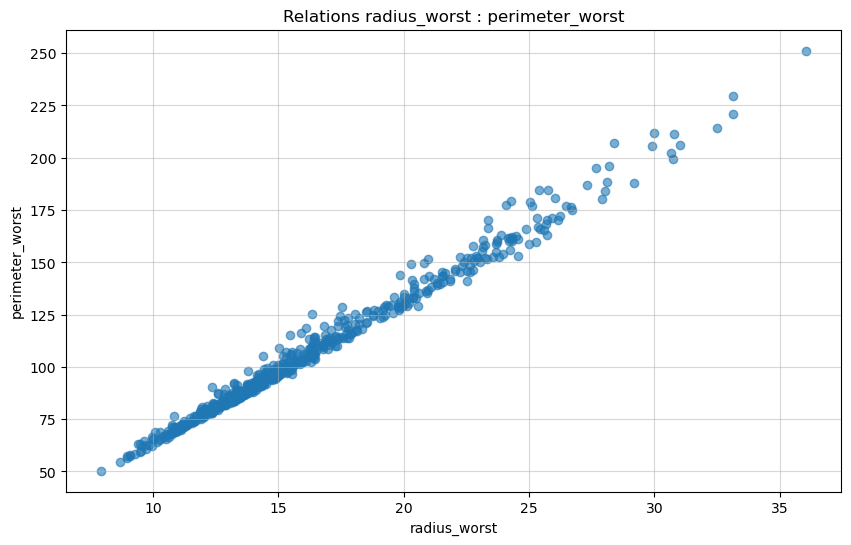

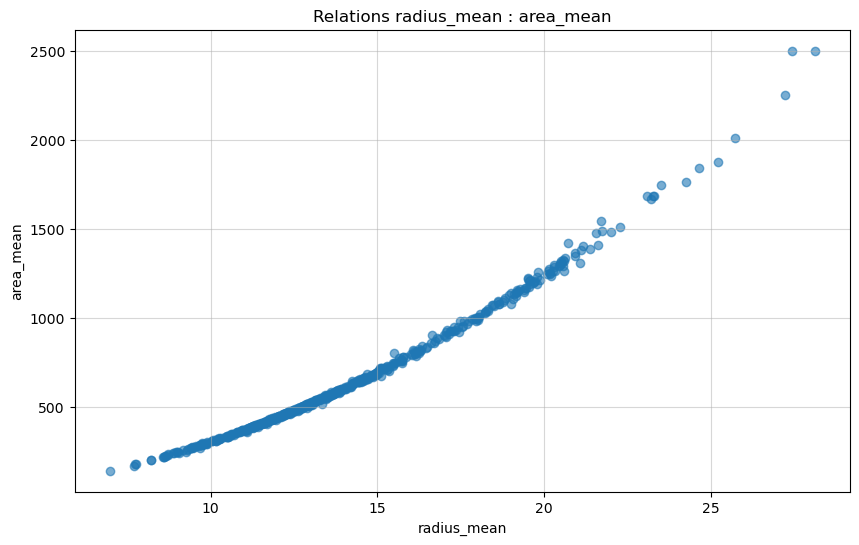

In [20]:
for pair in corr_pairs.head(3).index:
    plt.figure(figsize=(10,6))
    plt.scatter(df[pair[0]] , df[pair[1]] , alpha=0.6)
    plt.title(f"Relations {pair[0]} : {pair[1]}")
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.grid(alpha=0.5)
    plt.show()

#Les graphes suivants montrent que les FEATURES sont fortements liees les unes aux autres . 
#Quelques points non lineaires traduisent la presence des outliers
#On pourrait adapter une methode pour potentiellement supprimer ou remplacer les features avec une forte correlation pour eviter la redondance 
#Et garantir les performances du modele !!


In [21]:
#7

In [22]:
#8.a) IDENTIFICATIONS DES OUTLIERS PAR LA METHODE 1.5 IQR
# On ecrit  une fonction qui va filtrer le dataframe et extraire les features possedant les outliers et afficher le nombre de outlier Present  
def outlier_counter (feature_list):
    for feat in feature_list:
        Q1=df[feat].quantile(0.25)
        Q3=df[feat].quantile(0.75)
        IQR = Q3 - Q1
        MAX_box = Q3 + 1.5*IQR
        MIN_box = Q1 - 1.5*IQR
        outlier_nbre=df[(df[feat]>MAX_box) | (df[feat]<MIN_box)].shape[0]
        taille = df[feat].shape[0]
        print(f"{feat} : {outlier_nbre} Outlier (s)\n Pourcentage :{(outlier_nbre * 100)/taille : .2f} % \n")
        """Fonction de decompte des outliers presents par features caracteristiques :"""
num_feature_list = df.select_dtypes(include = np.number).columns
outlier_counter(num_feature_list)

radius_mean : 14 Outlier (s)
 Pourcentage : 2.46 % 

texture_mean : 7 Outlier (s)
 Pourcentage : 1.23 % 

perimeter_mean : 13 Outlier (s)
 Pourcentage : 2.28 % 

area_mean : 25 Outlier (s)
 Pourcentage : 4.39 % 

smoothness_mean : 6 Outlier (s)
 Pourcentage : 1.05 % 

compactness_mean : 16 Outlier (s)
 Pourcentage : 2.81 % 

concavity_mean : 18 Outlier (s)
 Pourcentage : 3.16 % 

concave points_mean : 10 Outlier (s)
 Pourcentage : 1.76 % 

symmetry_mean : 15 Outlier (s)
 Pourcentage : 2.64 % 

fractal_dimension_mean : 15 Outlier (s)
 Pourcentage : 2.64 % 

radius_se : 38 Outlier (s)
 Pourcentage : 6.68 % 

texture_se : 20 Outlier (s)
 Pourcentage : 3.51 % 

perimeter_se : 38 Outlier (s)
 Pourcentage : 6.68 % 

area_se : 65 Outlier (s)
 Pourcentage : 11.42 % 

smoothness_se : 30 Outlier (s)
 Pourcentage : 5.27 % 

compactness_se : 28 Outlier (s)
 Pourcentage : 4.92 % 

concavity_se : 22 Outlier (s)
 Pourcentage : 3.87 % 

concave points_se : 19 Outlier (s)
 Pourcentage : 3.34 % 

symmet

In [41]:
#8.b) Strategies de gestion des outliers:
#

data_X = df.drop("diagnosis", axis=1)
skew = data_X.skew()
limit = 1.5
skewed_cols = []

for col in skew.index:
    if abs(skew[col]) > limit:
        skewed_cols.append(col)
print(f"Colonnes Asymetriques : \n{skewed_cols}")
# variables tres importantes qui influencent la target a consever pour eviter que le log s'applique dessus  
protected_cols = ["radius","area","perimeter","concavity","concave points"]
cols_to_fix = []

for col in skewed_cols:
    verification = True

    for word in protected_cols:
        if word in col:
            verification= False

    if verification:
        cols_to_fix.append(col)

print(f"Colonnes à modifier: \n{cols_to_fix}")

for col in cols_to_fix:
    df[col] = np.log1p(df[col])


Colonnes Asymetriques : 
['area_mean', 'radius_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se', 'area_worst']
Colonnes à modifier: 
['smoothness_se', 'compactness_se', 'symmetry_se', 'fractal_dimension_se']


In [52]:
#9.a Creer des features de ratio :
df["compacity_ratio"] = df["perimeter_worst"] / df["area_worst"]
df["concavity_ratio"] = df["concavity_worst"] / df["concave points_worst"]
df["radius_ratio"] = df["radius_worst"] / df["radius_mean"]
df["texture_ratio"] = df["texture_worst"] / df["texture_mean"]
df["smoothness_ratio"] = df["smoothness_worst"] / df["smoothness_mean"]


In [61]:
#10.Standardisation des features numeriques 
num_col = df.drop(["diagnosis","diagnosis_enc"] , axis=1).columns.tolist()
scaler = StandardScaler()
df_scaled = df.copy()  
df_scaled[num_col] = scaler.fit_transform(df[num_col])


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_enc,compacity_ratio,concavity_ratio,radius_ratio,texture_ratio,smoothness_ratio
0,M,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,2.109526,2.296076,2.750622,1.940834,1,-1.402391,0.457192,3.310149,2.583508,-0.034068
1,M,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,-0.146749,1.087084,-0.243890,0.302723,1,-1.685098,-0.918403,0.897126,-0.108986,0.622784
2,M,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,0.854974,1.955000,1.152255,0.221603,1,-1.463040,-0.366975,0.677613,-0.995686,-0.412372
3,M,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,1.989588,2.175786,6.046041,4.705257,1,0.880369,0.442483,2.014637,-0.239681,0.704641
4,M,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,0.613179,0.729259,-0.868353,-0.393453,1,-1.258807,0.237617,-0.383659,-1.293318,-0.034372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,...,0.664512,1.629151,-1.360158,-0.718824,1,-1.664191,-0.367133,0.472809,-1.166287,-0.753389
565,M,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,...,0.236573,0.733827,-0.531855,-0.997680,1,-1.454482,-0.246345,0.428760,0.170789,-1.316660
566,M,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,...,0.326767,0.414069,-1.104549,-0.311907,1,-0.814892,0.176287,0.016419,-0.891035,-0.198633
567,M,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,...,3.197605,2.289985,1.919083,2.212137,1,-1.128069,1.312213,1.323773,0.094595,0.187850


In [80]:
#10.b) split train/test avec stratification
features =  df.drop(["diagnosis","diagnosis_enc"] , axis=1).columns.tolist()
X = df_scaled[features]
y = df_scaled['diagnosis_enc']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
y_test.shape

(114,)